In [1]:
# remember: your KAGGLE_KEY is private, don't share it with anyone
import os
os.environ['KAGGLE_USERNAME'] = '[YOUR KAGGLE USERNAME]'
os.environ['KAGGLE_KEY'] = '[YOUR KAGGLE KEY]'

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Create the file download path
!mkdir /content/dataset

# Download the target dataset to the specified path
# !kaggle datasets download -d vkehfdl1/kidf-kpop-idol-dataset-female -p /content/data
!kaggle datasets download -d yasserh/avengers-faces-dataset -p /content/dataset

# Unzip the downloaded dataset
# !unzip /content/data/kidf-kpop-idol-dataset-female.zip -d /content/data
!unzip /content/dataset/avengers-faces-dataset.zip -d /content/dataset
!rm /content/dataset/avengers-faces-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/yasserh/avengers-faces-dataset
License(s): CC0-1.0
 99% 89.0M/89.6M [00:05<00:00, 19.0MB/s]
100% 89.6M/89.6M [00:05<00:00, 15.9MB/s]
Archive:  /content/dataset/avengers-faces-dataset.zip
  inflating: /content/dataset/images/test/chris_evans/chris_evans29.png  
  inflating: /content/dataset/images/test/chris_evans/chris_evans30.png  
  inflating: /content/dataset/images/test/chris_evans/chris_evans31.png  
  inflating: /content/dataset/images/test/chris_evans/chris_evans32.png  
  inflating: /content/dataset/images/test/chris_evans/chris_evans33.png  
  inflating: /content/dataset/images/test/chris_evans/chris_evans35.png  
  inflating: /content/dataset/images/test/chris_evans/chris_evans36.png  
  inflating: /content/dataset/images/test/chris_evans/chris_evans37.png  
  inflating: /content/dataset/images/test/chris_evans/chris_evans38.png  
  inflating: /content/dataset/images/test/chris_evans/chris_evans39.png  
  inflating: /content/datase

In [3]:
import os
import os.path as op
import shutil
from glob import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split

In [4]:
# img_df = pd.DataFrame(glob("./dataset/images/train/*.jpg"), columns=["path"])
# img_df

In [5]:
base_dir = "dataset/images"
sets = ['train', 'val', 'test']

data = []
for set_type in sets:
  set_dir = os.path.join(base_dir, set_type)
  for class_name in os.listdir(set_dir):
    class_dir = os.path.join(set_dir, class_name)
    if os.path.isdir(class_dir):
      for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        data.append([img_path, class_name, set_type])

df = pd.DataFrame(data, columns=['file_path', 'label', 'set'])
# print(df.head())
df.head(10)
# df.to_csv('image_data.csv', index=False)

,file_path,label,set
0,dataset/images/train/chris_hemsworth/chris_hem...,chris_hemsworth,train
1,dataset/images/train/chris_hemsworth/chris_hem...,chris_hemsworth,train
2,dataset/images/train/chris_hemsworth/chris_hem...,chris_hemsworth,train
3,dataset/images/train/chris_hemsworth/chris_hem...,chris_hemsworth,train
4,dataset/images/train/chris_hemsworth/chris_hem...,chris_hemsworth,train
5,dataset/images/train/chris_hemsworth/chris_hem...,chris_hemsworth,train
6,dataset/images/train/chris_hemsworth/chris_hem...,chris_hemsworth,train
7,dataset/images/train/chris_hemsworth/chris_hem...,chris_hemsworth,train
8,dataset/images/train/chris_hemsworth/chris_hem...,chris_hemsworth,train
9,dataset/images/train/chris_hemsworth/chris_hem...,chris_hemsworth,train


In [6]:
df.tail(10)

,file_path,label,set
384,dataset/images/test/scarlett_johansson/scarlet...,scarlett_johansson,test
385,dataset/images/test/scarlett_johansson/scarlet...,scarlett_johansson,test
386,dataset/images/test/scarlett_johansson/scarlet...,scarlett_johansson,test
387,dataset/images/test/scarlett_johansson/scarlet...,scarlett_johansson,test
388,dataset/images/test/scarlett_johansson/scarlet...,scarlett_johansson,test
389,dataset/images/test/scarlett_johansson/scarlet...,scarlett_johansson,test
390,dataset/images/test/scarlett_johansson/scarlet...,scarlett_johansson,test
391,dataset/images/test/scarlett_johansson/scarlet...,scarlett_johansson,test
392,dataset/images/test/scarlett_johansson/scarlet...,scarlett_johansson,test
393,dataset/images/test/scarlett_johansson/scarlet...,scarlett_johansson,test


In [7]:
len(df[df['set'] == 'train'])

274

In [8]:
len(df[df['set'] == 'val'])

60

In [9]:
len(df[df['set'] == 'test'])

60

In [10]:
train_df = df[df['set'] == 'train']
valid_df = df[df['set'] == 'val']
test_df = df[df['set'] == 'test']

In [11]:
print(len(train_df))
print(len(valid_df))
print(len(test_df))

274
60
60


In [13]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [14]:
from fastbook import *

In [15]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    # splitter=RandomSplitter(valid_pct=0.2, seed=42),
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [16]:
get_image_files("dataset/images/train")

(#274) [Path('dataset/images/train/chris_hemsworth/chris_hemsworth52.png'),Path('dataset/images/train/chris_hemsworth/chris_hemsworth32.png'),Path('dataset/images/train/chris_hemsworth/chris_hemsworth48.png'),Path('dataset/images/train/chris_hemsworth/chris_hemsworth30.png'),Path('dataset/images/train/chris_hemsworth/chris_hemsworth9.png'),Path('dataset/images/train/chris_hemsworth/chris_hemsworth49.png'),Path('dataset/images/train/chris_hemsworth/chris_hemsworth40.png'),Path('dataset/images/train/chris_hemsworth/chris_hemsworth28.png'),Path('dataset/images/train/chris_hemsworth/chris_hemsworth25.png'),Path('dataset/images/train/chris_hemsworth/chris_hemsworth17.png')...]

In [17]:
parent_label("dataset/images/train/mark_ruffalo/mark_ruffalo62.png")

'mark_ruffalo'

In [18]:
import torch

torch.cuda.get_device_name(0)

'Tesla T4'

In [19]:
dls = fields.dataloaders("dataset/images/train/", device='cuda')

In [20]:
dls = fields.dataloaders("dataset/images/train/")

In [21]:
dls.vocab

['chris_evans', 'chris_hemsworth', 'mark_ruffalo', 'robert_downey_jr', 'scarlett_johansson']

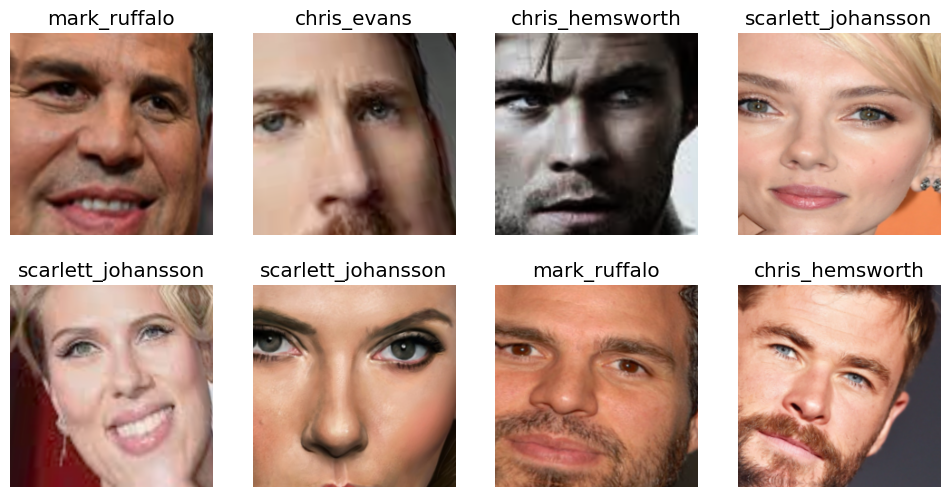

In [22]:
dls.train.show_batch(max_n=8, nrows=2)

In [23]:
# model = models.resnet34(pretrained=True)
torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 43.6MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
learner = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])

In [25]:
learner

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0010000000474974513)

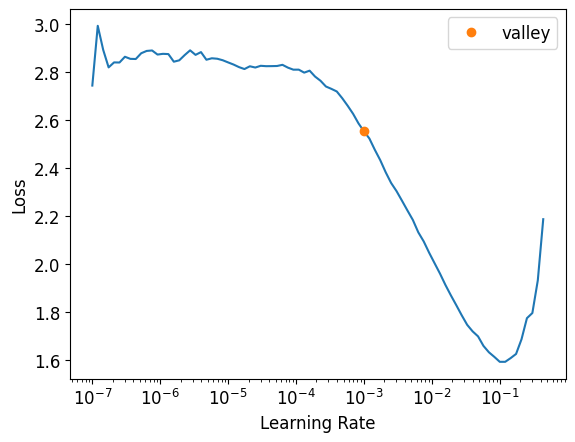

In [26]:
learner.lr_find()

In [27]:
# learner.fine_tune(epochs=10, freeze_epochs=1, base_lr=0.00047863)

[0, 2.8729166984558105, 3.255927085876465, 0.9629629850387573, 0.03703703731298447, '00:02']
[0, 2.3946685791015625, 2.2908623218536377, 0.7777777910232544, 0.2222222238779068, '00:02']
[1, 2.1990208625793457, 1.7876523733139038, 0.666666567325592, 0.3333333432674408, '00:02']
[2, 2.0618577003479004, 1.4829332828521729, 0.5925925970077515, 0.40740740299224854, '00:02']
[3, 1.8920518159866333, 1.2582379579544067, 0.4444444179534912, 0.5555555820465088, '00:02']
[4, 1.7035048007965088, 0.9966884851455688, 0.37037035822868347, 0.6296296119689941, '00:03']
[5, 1.6026109457015991, 0.7191212773323059, 0.29629629850387573, 0.7037037014961243, '00:02']
[6, 1.4628547430038452, 0.5115430951118469, 0.2592592239379883, 0.7407407164573669, '00:02']
[7, 1.3460651636123657, 0.34459516406059265, 0.2222222089767456, 0.7777777910232544, '00:02']
[8, 1.2182356119155884, 0.22981004416942596, 0.07407408952713013, 0.9259259104728699, '00:02']
[9, 1.1169087886810303, 0.1706862598657608, 0.07407408952713013, 

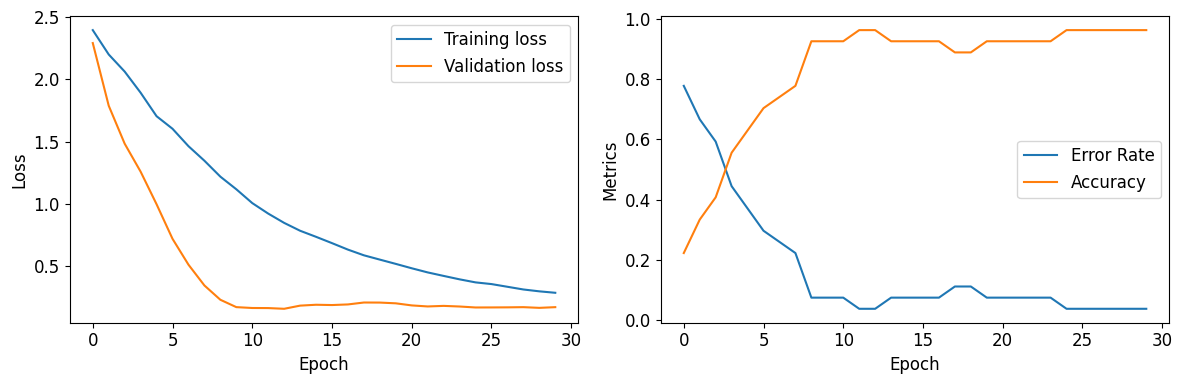

In [28]:
train_loss = []
valid_loss = []
error_rate = []
accuracy = []

# Training with fine_tune
with learner.no_bar():
  # learner.fine_tune(epochs=10, freeze_epochs=1, base_lr=0.00047863)
  # learner.fine_tune(epochs=20, freeze_epochs=1, base_lr=0.001737800776027143)
  learner.fine_tune(epochs=30, freeze_epochs=1, base_lr=0.001737800776027143)

  # Extract metrics from recorder
  for i in range(len(learner.recorder.values)):
    train_loss.append(learner.recorder.values[i][0])
    valid_loss.append(learner.recorder.values[i][1])
    error_rate.append(learner.recorder.values[i][2])
    accuracy.append(1 - learner.recorder.values[i][2])

print(accuracy)

# Plotting the graphs (same as before)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(error_rate, label='Error Rate')
plt.plot(accuracy, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()

plt.tight_layout()
plt.show()

# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.plot(train_loss, label='Training loss')
# plt.plot(valid_loss, label='Validation loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(error_rate, label='Error Rate')
# plt.plot(accuracy, label='Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Metrics')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [29]:
# print(accuracy)
type(accuracy)
# accuracy.max()

list

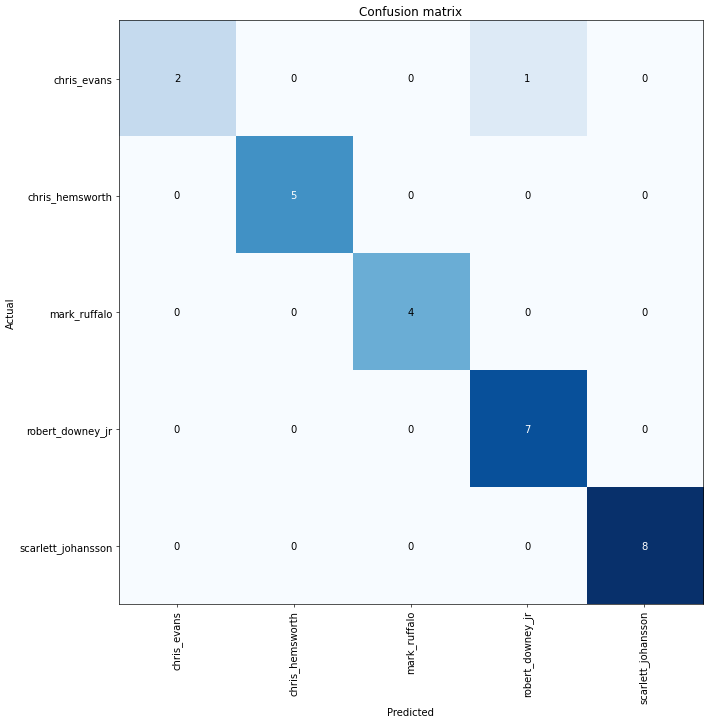

In [30]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [31]:
interp.most_confused(min_val=5)

[]

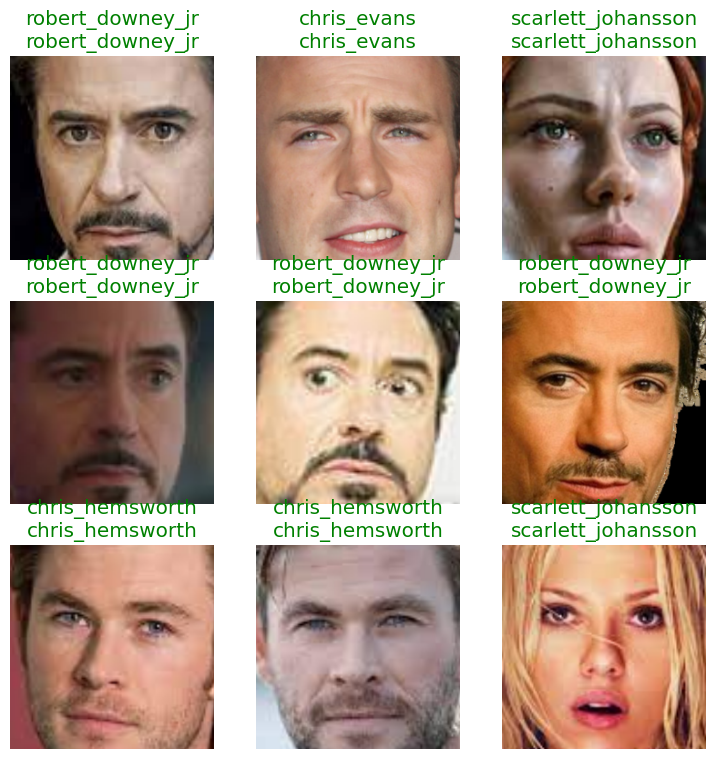

In [32]:
learner.show_results(shuffle=True)

In [33]:
learner.export("resnet34_fastai.pkl")

In [34]:
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

learn_inf = load_learner('resnet34_fastai.pkl')

In [35]:
test_df

,file_path,label,set
334,dataset/images/test/chris_hemsworth/chris_hemsworth32.png,chris_hemsworth,test
335,dataset/images/test/chris_hemsworth/chris_hemsworth28.png,chris_hemsworth,test
336,dataset/images/test/chris_hemsworth/chris_hemsworth13.png,chris_hemsworth,test
337,dataset/images/test/chris_hemsworth/chris_hemsworth14.png,chris_hemsworth,test
338,dataset/images/test/chris_hemsworth/chris_hemsworth8.png,chris_hemsworth,test
339,dataset/images/test/chris_hemsworth/chris_hemsworth35.png,chris_hemsworth,test
340,dataset/images/test/chris_hemsworth/chris_hemsworth33.png,chris_hemsworth,test
341,dataset/images/test/chris_hemsworth/chris_hemsworth34.png,chris_hemsworth,test
342,dataset/images/test/chris_hemsworth/chris_hemsworth53.png,chris_hemsworth,test
343,dataset/images/test/chris_hemsworth/chris_hemsworth39.png,chris_hemsworth,test


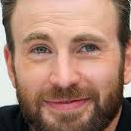

In [36]:
# Image.open("./datasets/images/test/chris_evans/chris_evans37.png")
image_path_demo = "/content/dataset/images/test/chris_evans/chris_evans29.png"
Image.open(image_path_demo)

In [37]:
learn_inf.predict(image_path_demo)

('chris_evans',
 tensor(0),
 tensor([1.0000e+00, 7.3991e-10, 1.8632e-11, 5.6008e-12, 2.0172e-08]))

In [38]:
# learner = vision_learner(dls, learn_inf, metrics=[error_rate, accuracy]) # can't re-train on the model that have been fine-tuned already

In [39]:
learner